<a href="https://colab.research.google.com/github/mauriciogonrails/concrete-strength-prediction/blob/main/Dataset_Concreto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autores: Felipe Emanoel e Mauricio dos Santos

# Análise de Regressão: Predição da Resistência do Concreto

## Introdução

Este projeto tem como objetivo desenvolver um modelo de regressão linear para prever a resistência à compressão do concreto com base em seus componentes e idade. O conjunto de dados utilizado é proveniente do UCI Machine Learning Repository e contém informações sobre diferentes misturas de concreto e suas respectivas resistências.

### Sobre o Dataset
O conjunto de dados inclui 1030 amostras com 8 variáveis explicativas e 1 variável alvo:

**Variável Alvo:**
- Resistência à compressão do concreto (MPa)

**Variáveis Explicativas:**
- Cimento (kg/m³)
- Escória de alto forno (kg/m³)
- Cinzas volantes (kg/m³)
- Água (kg/m³)
- Superplastificante (kg/m³)
- Agregado graúdo (kg/m³)
- Agregado fino (kg/m³)
- Idade (dias)

### Objetivo
O objetivo principal é desenvolver um modelo capaz de prever a resistência do concreto com base em sua composição e idade, fornecendo uma ferramenta útil para engenheiros e profissionais da construção civil na otimização de misturas de concreto.

### Metodologia
A análise inclui:
1. Análise exploratória dos dados
2. Matriz de correlação entre variáveis
3. Padronização dos dados
4. Desenvolvimento do modelo de regressão linear
5. Avaliação do modelo através de métricas como R² e RMSE

Esta análise pode auxiliar na compreensão dos fatores que mais influenciam a resistência do concreto e na otimização de suas formulações.

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# Carregar o arquivo do diretório local do Colab
data = pd.read_excel('/content/Concrete_Data.xls')  # Note que usamos read_excel para arquivos .xls

# Renomear colunas para melhor compreensão
columns = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
           'coarse_aggregate', 'fine_aggregate', 'age', 'strength']
data.columns = columns

# Mostrar as primeiras linhas do dataset
print("Primeiras linhas do dataset:")
print(data.head())

# Informações sobre o dataset
print("\nInformações do dataset:")
print(data.info())

Primeiras linhas do dataset:
   cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate  age   strength  
0            1040.0           676.0   28  79.986111  
1            1055.0           676.0   28  61.887366  
2             932.0           594.0  270  40.269535  
3             932.0           594.0  365  41.052780  
4             978.4           825.5  360  44.296075  

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cement    

In [ ]:
# Identificação das variáveis
print("\nVariável alvo (Y):")
print("- strength (Resistência à compressão do concreto)")

print("\nVariáveis explicativas (X):")
for col in columns[:-1]:
    print(f"- {col}")

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(data.describe())


Variável alvo (Y):
- strength (Resistência à compressão do concreto)

Variáveis explicativas (X):
- cement
- blast_furnace_slag
- fly_ash
- water
- superplasticizer
- coarse_aggregate
- fine_aggregate
- age

Estatísticas descritivas:
            cement  blast_furnace_slag      fly_ash        water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.165631           73.895485    54.187136   181.566359   
std     104.507142           86.279104    63.996469    21.355567   
min     102.000000            0.000000     0.000000   121.750000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.270000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       superplasticizer  coarse_aggregate  fine_aggregate          age  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean

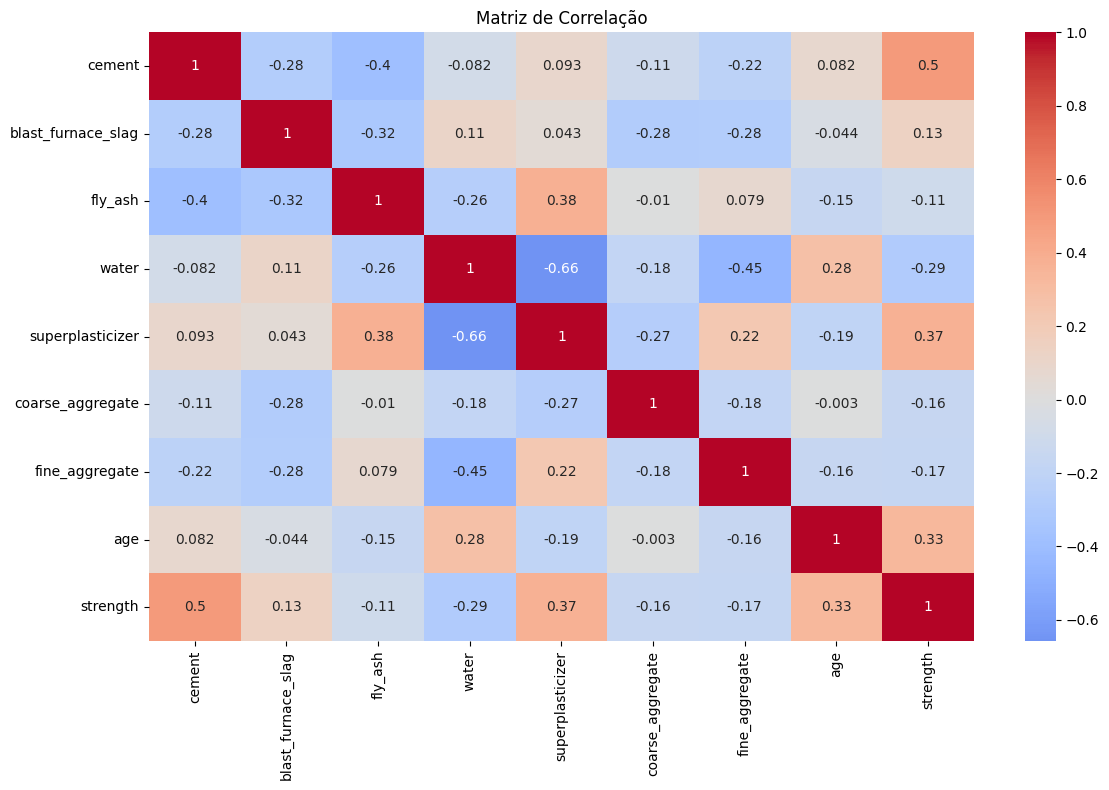


Correlações com a variável alvo (strength):
strength              1.000000
cement                0.497833
superplasticizer      0.366102
age                   0.328877
water                 0.289613
fine_aggregate        0.167249
coarse_aggregate      0.164928
blast_furnace_slag    0.134824
fly_ash               0.105753
Name: strength, dtype: float64


In [ ]:
# Criar a matriz de correlação
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.tight_layout()
plt.show()

# Mostrar correlações com a variável alvo
correlations = correlation_matrix['strength'].abs().sort_values(ascending=False)
print("\nCorrelações com a variável alvo (strength):")
print(correlations)

In [ ]:
# Separar features e target
X = data[columns[:-1]]
y = data['strength']

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Avaliar o modelo
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Resultados do modelo:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

Resultados do modelo:
R² Score: 0.6275
RMSE: 9.7967


In [ ]:
# Formar a equação da reta
print("Equação da regressão linear:")
print("Y = ", end="")
for i, coef in enumerate(model.coef_):
    print(f"{coef:.4f}*{columns[i]} + ", end="")
print(f"{model.intercept_:.4f}")

# Criar um DataFrame com os coeficientes para melhor visualização
coef_df = pd.DataFrame({
    'Variável': columns[:-1],
    'Coeficiente': model.coef_
})
print("\nCoeficientes do modelo:")
print(coef_df)

Equação da regressão linear:
Y = 0.1190*cement + 0.1085*blast_furnace_slag + 0.0822*fly_ash + -0.1357*water + 0.3087*superplasticizer + 0.0178*coarse_aggregate + 0.0241*fine_aggregate + 0.1164*age + -28.6357

Coeficientes do modelo:
             Variável  Coeficiente
0              cement     0.118975
1  blast_furnace_slag     0.108518
2             fly_ash     0.082169
3               water    -0.135712
4    superplasticizer     0.308732
5    coarse_aggregate     0.017804
6      fine_aggregate     0.024061
7                 age     0.116444


In [ ]:
# Verificar dados faltantes
print("Verificação de dados faltantes:")
print(data.isnull().sum())

Verificação de dados faltantes:
cement                0
blast_furnace_slag    0
fly_ash               0
water                 0
superplasticizer      0
coarse_aggregate      0
fine_aggregate        0
age                   0
strength              0
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

# Separar features e target
X = data[columns[:-1]]
y = data['strength']

# Padronizar as features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Treinar modelo com dados padronizados
model = LinearRegression()
model.fit(X_train, y_train)

# Avaliar o modelo
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nResultados do modelo com dados padronizados:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# Criar DataFrame com os coeficientes padronizados
coef_df = pd.DataFrame({
    'Variável': columns[:-1],
    'Coeficiente Padronizado': model.coef_
})
print("\nCoeficientes do modelo padronizado:")
print(coef_df.sort_values('Coeficiente Padronizado', ascending=False))


Resultados do modelo com dados padronizados:
R² Score: 0.6275
RMSE: 9.7967

Coeficientes do modelo padronizado:
             Variável  Coeficiente Padronizado
0              cement                12.427717
1  blast_furnace_slag                 9.358273
7                 age                 7.352216
2             fly_ash                 5.255943
6      fine_aggregate                 1.928168
4    superplasticizer                 1.843313
5    coarse_aggregate                 1.383685
3               water                -2.896798


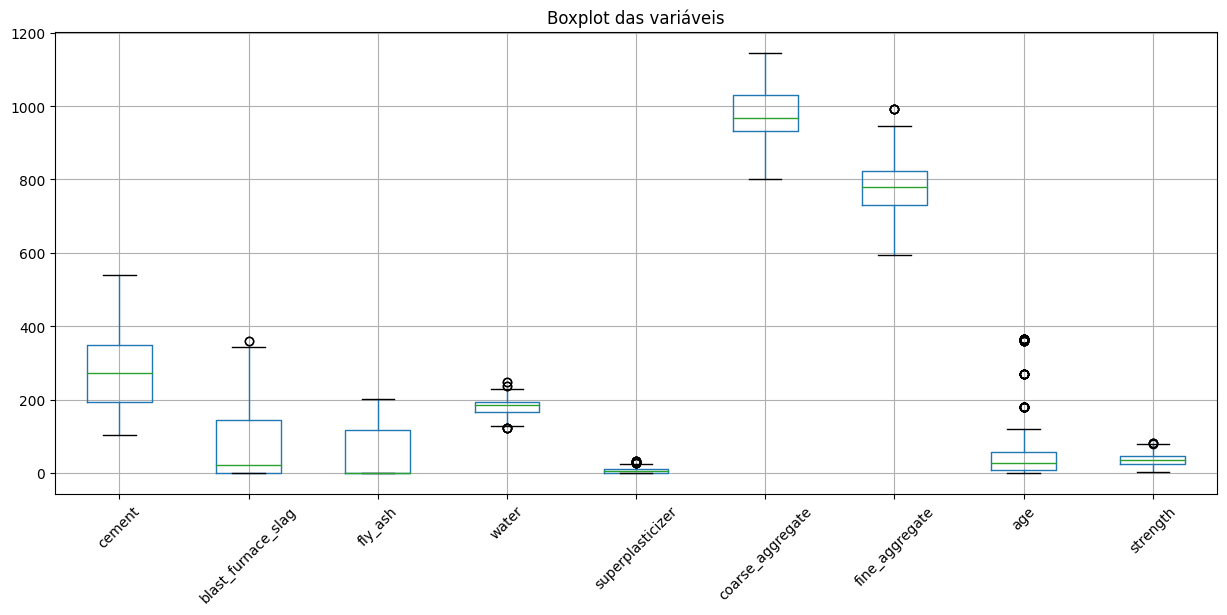


Número de outliers por variável:
cement: 0
blast_furnace_slag: 2
fly_ash: 0
water: 9
superplasticizer: 10
coarse_aggregate: 0
fine_aggregate: 5
age: 59
strength: 4


In [ ]:
# Criar boxplots para visualizar outliers
plt.figure(figsize=(15, 6))
data.boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot das variáveis')
plt.show()

# Análise mais detalhada dos outliers
def detect_outliers(df):
    outliers = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])
    return outliers

outliers = detect_outliers(data)
print("\nNúmero de outliers por variável:")
for var, count in outliers.items():
    print(f"{var}: {count}")